# FLAT type (phase transition) affect on trend forecasting

In [1]:
%matplotlib inline
import importlib
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import os
from sklearn.linear_model import LinearRegression, HuberRegressor
from functools import reduce
import stumpy
from phasetrans.preprocess import feature_extraction
from phasetrans.network import network_generation
from phasetrans.community import communities_detection
from phasetrans.classification import trend_classification
from phasetrans.forecasting import PredictiveModel
import phasetrans.forecasting

### Parameters

In [2]:
# File with dataset
dataset_file = './BVSP_orig.txt'
# Columnt to use
column_name = 'Close'
# Short window
short_window = 7
# Long window
long_window = 30
# Region to plot visualizations
sel_start = 1000
sel_finish = 2000


### Reading sample dataset

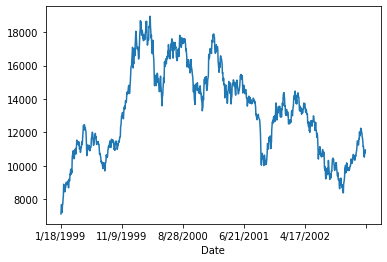

In [3]:
df = pd.read_csv('./BVSP_orig.txt', sep='\t')
df = df.set_index('Date')
df.iloc[sel_start:sel_finish, :][column_name].plot()

### Feature extraction

In [4]:
df = feature_extraction(data=df, short_window=short_window, long_window=long_window, column_name=column_name)

### Sample features plot for selected region

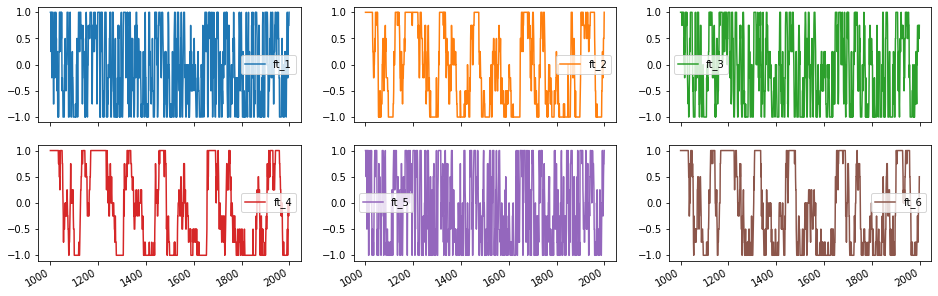

In [5]:
df[['ft_1', 'ft_2', 'ft_3',
    'ft_4', 'ft_5', 'ft_6']].iloc[sel_start:sel_finish, :].plot(figsize=(16, 8), subplots=True, layout=(3,3));

### Network construction

In [6]:
df, network = network_generation(df)

### Communities detection

In [7]:
df = communities_detection(df, network)

### Communities

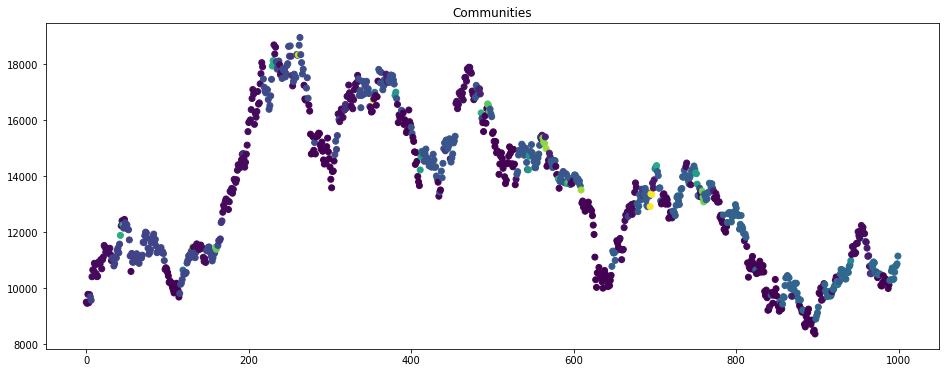

In [8]:
plt.figure(figsize=(16, 6))
plt.title('Communities')
data = df.iloc[sel_start:sel_finish, :]
x = range(len(data))
plt.scatter(x, data[column_name], c=data['community'], s=36)
plt.show()

### Communities classification for UP and DOWN classes

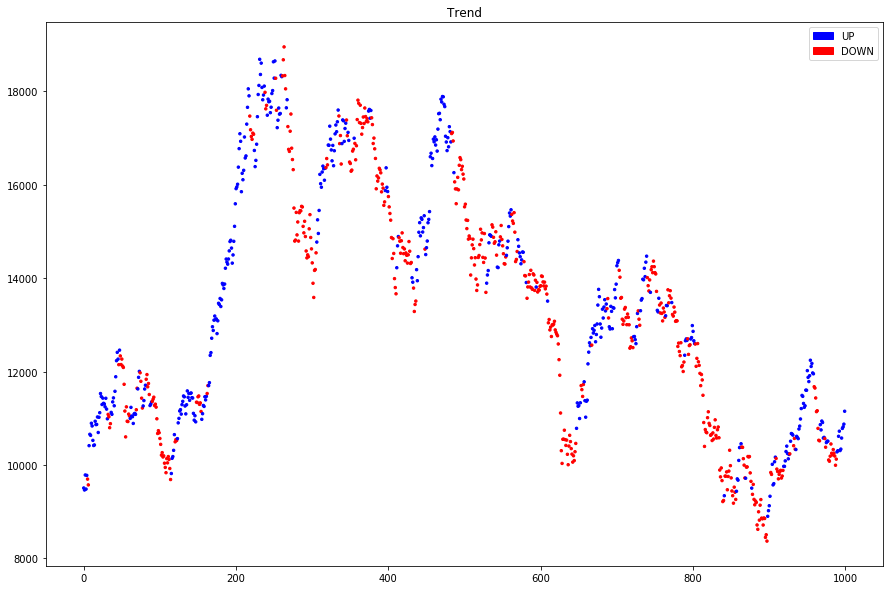

In [9]:
df = trend_classification(data=df, column_name=column_name)
plt.figure(figsize=(15, 10))
plt.title('Trend')
data = df.iloc[sel_start:sel_finish, :]
data['color'] = 'r'
data.loc[data.loc[:, 'trend'] == 'UP', 'color'] = 'b'
scatter = plt.scatter(range(len(data)), list(data[column_name]), c=data['color'], s=6)
leg_up = mpatches.Patch(color='b', label='UP')
leg_down = mpatches.Patch(color='r', label='DOWN')
plt.legend(handles=[leg_up, leg_down])
plt.show()


### Trend forecasting for [UP, DOWN] set

In [10]:
importlib.reload(phasetrans.forecasting)
model_2 = phasetrans.forecasting.PredictiveModel()
model_2.train(data=df, split = [0.7,0.2,0.1], validation='OOS')

Näive Bayes Prediction UP Accuracy on test: 0.6954
Decision Tree Prediction UP Accuracy on test: 0.7238
MLP Prediction UP Accuracy on test: 0.6954
SVM Prediction UP Accuracy on test: 0.6791
KNN Prediction UP Accuracy on test: 0.7027


('Decision_Tree', 0.7238017871649066)

### Communities classification for UP, DOWN and FLAT classes

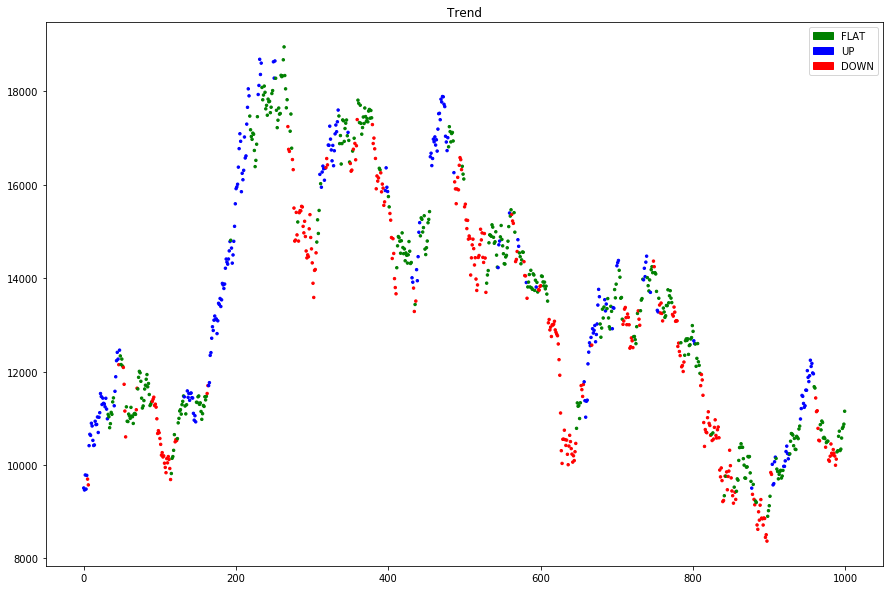

In [11]:
df = trend_classification(data=df, column_name=column_name, with_flat=True)
plt.figure(figsize=(15, 10))
plt.title('Trend')
data = df.iloc[sel_start:sel_finish, :]
data['color'] = 'g'
data.loc[data.loc[:, 'trend'] == 'UP', 'color'] = 'b'
data.loc[data.loc[:, 'trend'] == 'DW', 'color'] = 'r'
scatter = plt.scatter(range(len(data)), list(data[column_name]), c=data['color'], s=6)
leg_up = mpatches.Patch(color='b', label='UP')
leg_down = mpatches.Patch(color='r', label='DOWN')
leg_flat = mpatches.Patch(color='g', label='FLAT')
plt.legend(handles=[leg_flat, leg_up, leg_down])
plt.show()


### Trend forecasting for [FLAT, UP, DOWN] set

In [13]:
importlib.reload(phasetrans.forecasting)
model_2 = phasetrans.forecasting.PredictiveModel()
model_2.train(data=df, split = [0.7,0.2,0.1], validation='OOS', with_flat=True)

Näive Bayes Prediction UP Accuracy on test: 0.7954
Decision Tree Prediction DOWN Accuracy on test: 0.8238
MLP Prediction UP Accuracy on test: 0.8416
SVM Prediction UP Accuracy on test: 0.8292
KNN Prediction UP Accuracy on test: 0.7989


('MLP', 0.8416370106761566)